In [3]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt

In [4]:
STRUCTURE_ID = "SLC25A17"
STRUCTURE_NAME = "peroxisome"

In [5]:
base_folder = base_folder = f"/allen/aics/animated-cell/Saurabh/cellpack-analysis/results/{STRUCTURE_ID}/RSV/"

### load previously calculated correlations

Run `scripts/calculate_individual_PILR_correlations.sh` to calculate correlations

In [6]:
df = pd.read_csv(
    base_folder + "individual_PILR_corr.csv", index_col=[0, 1], header=[0, 1]
)

In [7]:
df.head()

channel          SLC25A17                                                    \
cellid             743916    743920    743921    745991    746203    746983   
channel  cellid                                                               
SLC25A17 743916  1.000000 -0.002525  0.000119  0.000573 -0.000649  0.006229   
         743920 -0.002525  1.000000 -0.002633  0.001373  0.003120  0.002087   
         743921  0.000119 -0.002633  1.000000  0.009601  0.008568 -0.000255   
         745991  0.000573  0.001373  0.009601  1.000000 -0.001918 -0.002551   
         746203 -0.000649  0.003120  0.008568 -0.001918  1.000000 -0.001273   

channel                                                  ...  \
cellid             747001    747683    747697    747936  ...   
channel  cellid                                          ...   
SLC25A17 743916  0.020984  0.002980 -0.000809 -0.002110  ...   
         743920  0.010429  0.000151  0.001201  0.001076  ...   
         743921  0.000737 -0.002129 -0.002170 -0.002201  ...   
         745991 -0.002831 -0.003223 -0.002661  0.000315  ...   
         746203 -0.002104 -0.000843 -0.001978 -0.001320  ...   

channel         planar_gradient_Z                                            \
cellid                     837848 837850 837851 837852 838089 838090 838249   
channel  cellid                                                               
SLC25A17 743916               NaN    NaN    NaN    NaN    NaN    NaN    NaN   
         743920               NaN    NaN    NaN    NaN    NaN    NaN    NaN   
         743921               NaN    NaN    NaN    NaN    NaN    NaN    NaN   
         745991               NaN    NaN    NaN    NaN    NaN    NaN    NaN   
         746203               NaN    NaN    NaN    NaN    NaN    NaN    NaN   

channel                               
cellid          838634 838649 838652  
channel  cellid                       
SLC25A17 743916    NaN    NaN    NaN  
         743920    NaN    NaN    NaN  
         743921    NaN    NaN    NaN  
         745991    NaN    NaN    NaN  
         746203    NaN    NaN    NaN  

[5 rows x 2135 columns]

In [65]:
df.index = df.index.set_levels(df.index.levels[1].astype(str), level=1)

In [66]:
df.shape

(2135, 2135)

### create clustered heatmap with correlation values

In [67]:
channels_to_use = [
    STRUCTURE_ID,
    "nucleus_moderate",
    "random",
    "membrane_moderate",
    "planar_gradient_Z"
]

In [68]:
df_subset = df.loc[channels_to_use, channels_to_use]
df_clean = df_subset.fillna(0)

In [73]:
# find nonzero values
df_tmp = df_clean.loc["nucleus_moderate", STRUCTURE_ID]
df_tmp

cellid    743916    743920    743921    745991    746203    746983    747001  \
cellid                                                                         
743916  0.002512 -0.003238 -0.002579  0.001755 -0.000376 -0.003421 -0.004315   
743920 -0.004527 -0.000315  0.060036 -0.002599  0.000473 -0.002396 -0.005368   
743921 -0.003451 -0.001552 -0.006353 -0.003902 -0.003875 -0.005306 -0.000904   
745991 -0.000785  0.009697 -0.003690 -0.001923 -0.001646 -0.004157 -0.004738   
746203 -0.003475 -0.000201 -0.000870  0.008293 -0.001915  0.005099 -0.001341   
...          ...       ...       ...       ...       ...       ...       ...   
838090  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
838249  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
838634  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
838649  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
838652  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

cellid    747683    747697    747936  ...    837848    837850    837851  \
cellid                                ...                                 
743916 -0.003393 -0.003137  0.001421  ...  0.002700  0.010370  0.001168   
743920 -0.001819 -0.002079  0.002182  ... -0.002526  0.004918  0.001430   
743921 -0.003066  0.002790 -0.004331  ... -0.004969 -0.003039  0.007031   
745991  0.000491  0.041112 -0.002308  ... -0.002219 -0.002083 -0.002488   
746203 -0.000941 -0.001724  0.002293  ... -0.000976  0.001080  0.006885   
...          ...       ...       ...  ...       ...       ...       ...   
838090  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
838249  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
838634  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
838649  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
838652  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

cellid    837852    838089    838090    838249    838634    838649    838652  
cellid                                                                        
743916  0.017812  0.002248 -0.000255  0.003545  0.001751 -0.006290 -0.002381  
743920  0.023659 -0.001612 -0.002608 -0.004066  0.003783 -0.005330 -0.002591  
743921 -0.004984  0.011386 -0.010479 -0.006446  0.001877  0.003520 -0.004673  
745991 -0.002149 -0.001045  0.004085  0.001945 -0.004816  0.000706  0.001691  
746203 -0.001065  0.000238 -0.002667 -0.002903 -0.001346 -0.005051  0.000481  
...          ...       ...       ...       ...       ...       ...       ...  
838090  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
838249  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
838634  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
838649  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
838652  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[305 rows x 305 columns]

In [52]:
save_dir = Path(base_folder + "correlation_heatmap/")
save_dir.mkdir(parents=True, exist_ok=True)

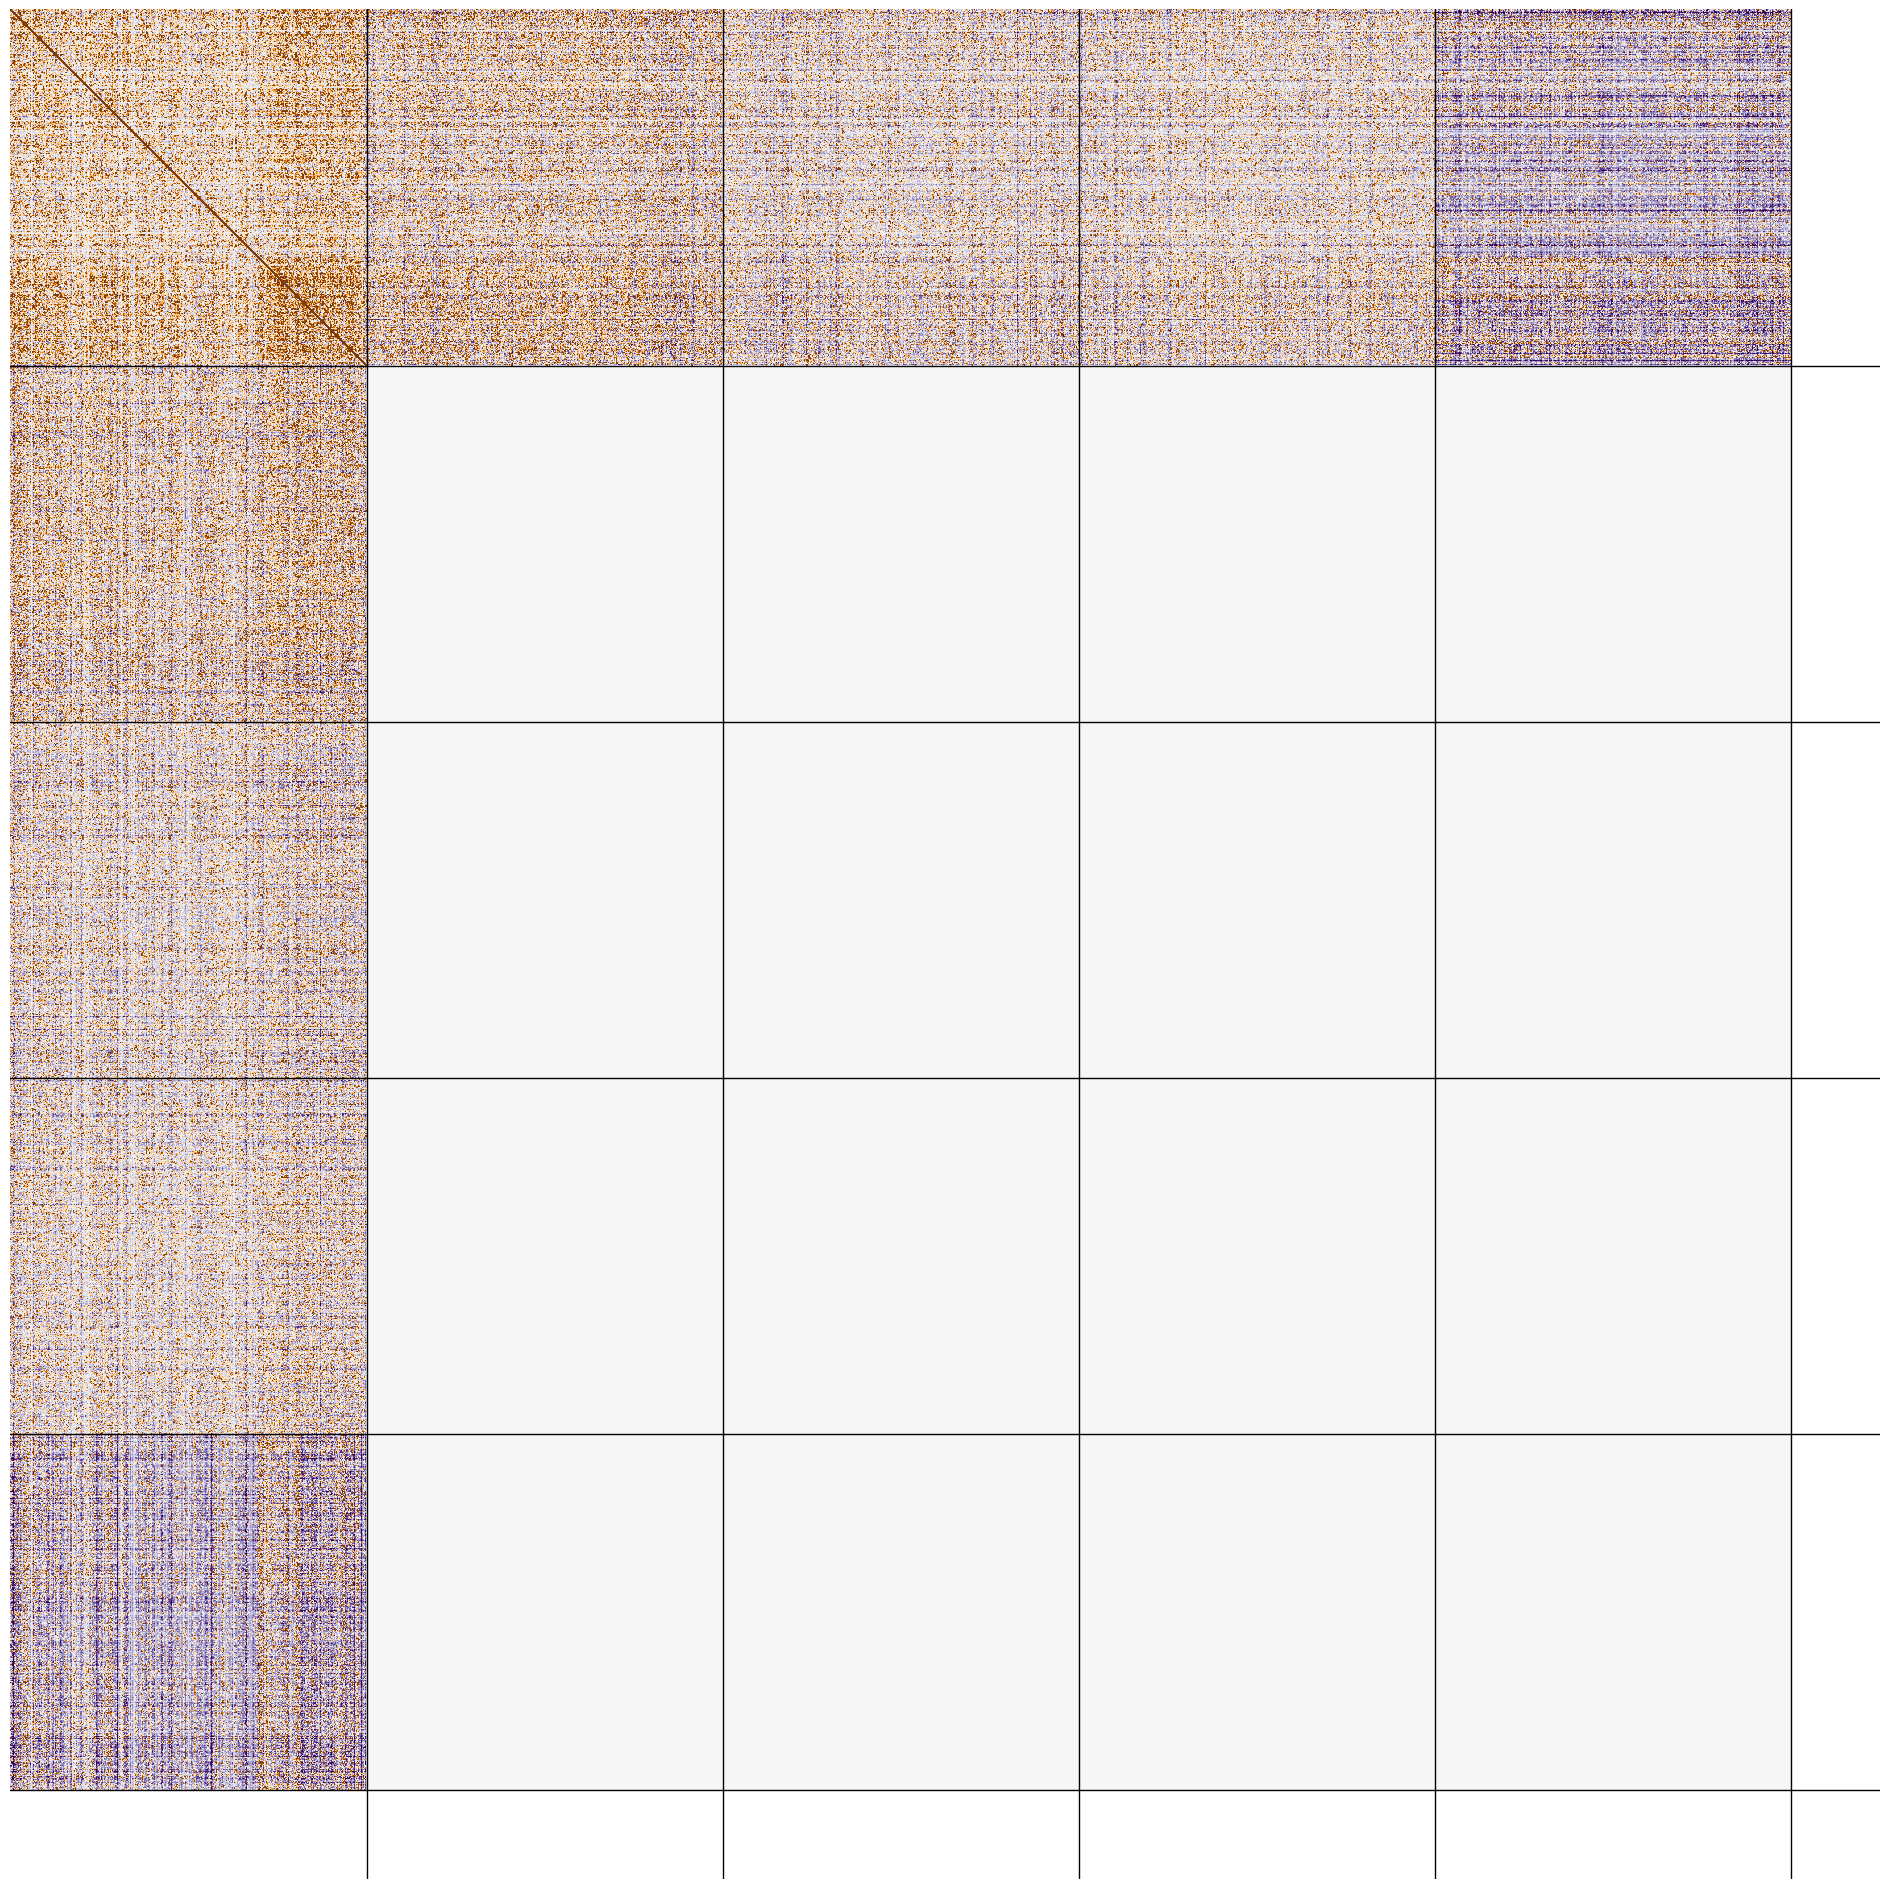

In [54]:
vmin = np.min(-df_clean.values)
vmax = np.max(-df_clean.values)
vmin = -0.01
vmax = 0.01
make_individual_PILR_heatmap(df_clean, channels_to_use, save_dir, vmin=vmin, vmax=vmax)

#### visualize average and stdev correlation values

In [30]:
df_avg_corr = pd.DataFrame(
    index=channels_to_use,
    columns=channels_to_use,
)
df_std_corr = df_avg_corr.copy()
df_sem_corr = df_avg_corr.copy()
df_avg_corr.shape

(5, 5)

In [41]:
for ch1 in channels_to_use:
    for ch2 in channels_to_use:
        df_ch = df_clean.loc[ch1, ch2]
        df_avg_corr.loc[ch1, ch2] = np.mean(df_ch.values)
        stdval = np.std(df_ch.values)
        df_std_corr.loc[ch1, ch2] = np.std(df_ch.values)
        df_sem_corr.loc[ch1, ch2] = stdval / np.sqrt(df_ch.values.size)
df_avg_corr = df_avg_corr.astype(float)
df_std_corr = df_std_corr.astype(float)
df_sem_corr = df_sem_corr.astype(float)

In [42]:
df_avg_norm = df_avg_corr / df_avg_corr.loc[STRUCTURE_ID, STRUCTURE_ID]

In [43]:
df_sem_norm = df_sem_corr / df_avg_corr.loc[STRUCTURE_ID, STRUCTURE_ID]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.hist(df_avg_corr.values.ravel(), bins=4)
plt.show()

In [ ]:
make_individual_PILR_heatmap(df_avg_corr, channels_to_use, save_dir, suffix="_avg", vmin=minval, vmax=maxval, drawlines=False)

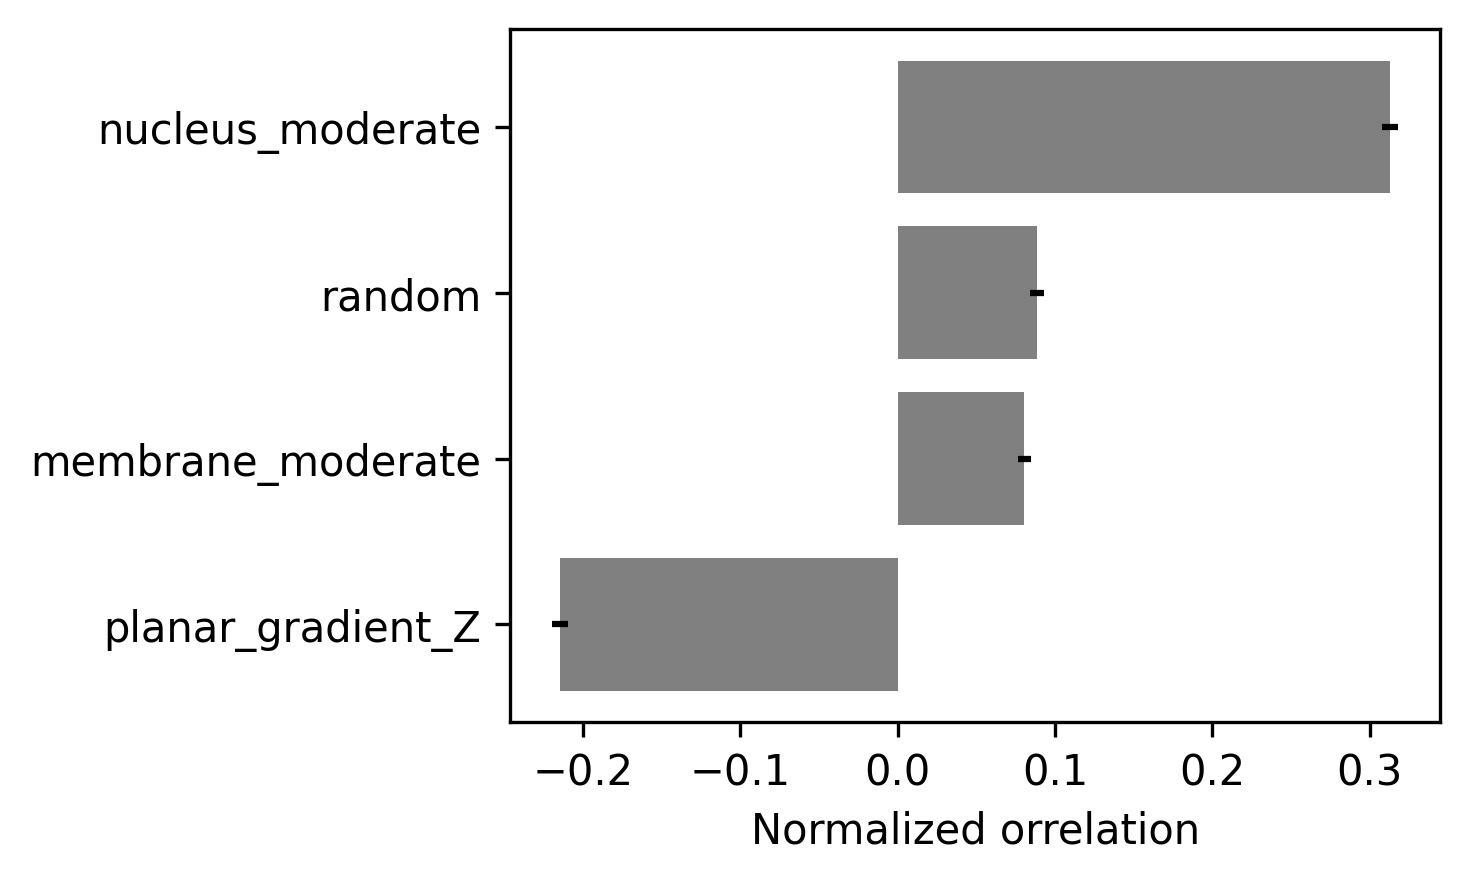

In [47]:
bar_vals = df_avg_corr.loc[STRUCTURE_ID, [col for col in df_avg_corr.columns if col != STRUCTURE_ID]].values / df_avg_corr.loc[STRUCTURE_ID, STRUCTURE_ID]
bar_errs = df_sem_corr.loc[STRUCTURE_ID, [col for col in df_avg_corr.columns if col != STRUCTURE_ID]].values / df_avg_corr.loc[STRUCTURE_ID, STRUCTURE_ID]

fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
y_pos = np.arange(len(bar_vals))

ax.barh(
    y_pos,
    bar_vals,
    xerr=bar_errs,
    color="gray",
    
) 
ax.set_yticks(y_pos, labels = [col for col in df_avg_corr.columns if col != STRUCTURE_ID])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Relative Concordance")
# ax.set_xlim([-0.3, 0.3])
plt.show()


In [48]:
print(bar_vals)
print(bar_errs)

[ 0.3128967   0.08870538  0.08052566 -0.21451519]
[0.00507634 0.00448347 0.00416548 0.00495055]
